In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes\r\n1452-KIOVK,M

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
# meta = pd.read_csv('/content/metadata.csv')

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df = df.drop(columns = ['customerid'])

In [ ]:
jumlah_spasi_kosong = (df['totalcharges'].str.strip() == '').sum()
jumlah_spasi_kosong

11

In [ ]:
df = df[df['totalcharges'].str.strip() != '']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 
 17  

In [ ]:
df.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


# Visualisasi

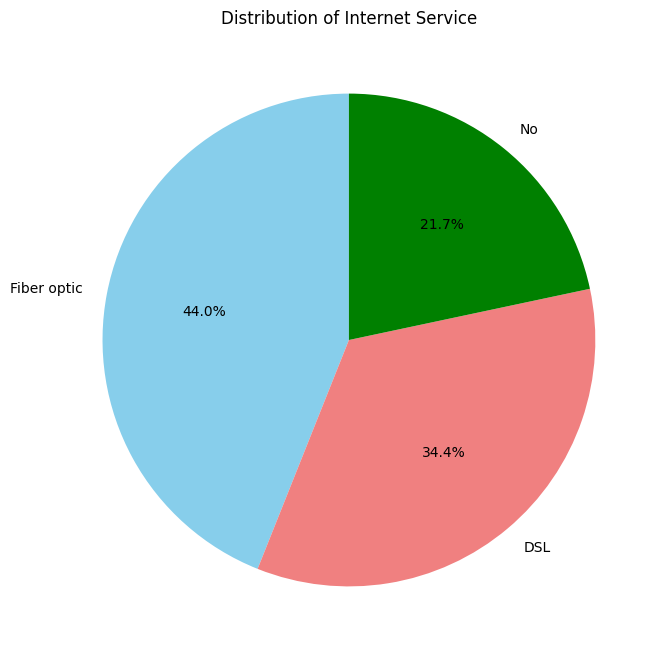

In [ ]:
partner_counts = df['internetservice'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(partner_counts, labels=partner_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral','green'])
plt.title('Distribution of Internet Service')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


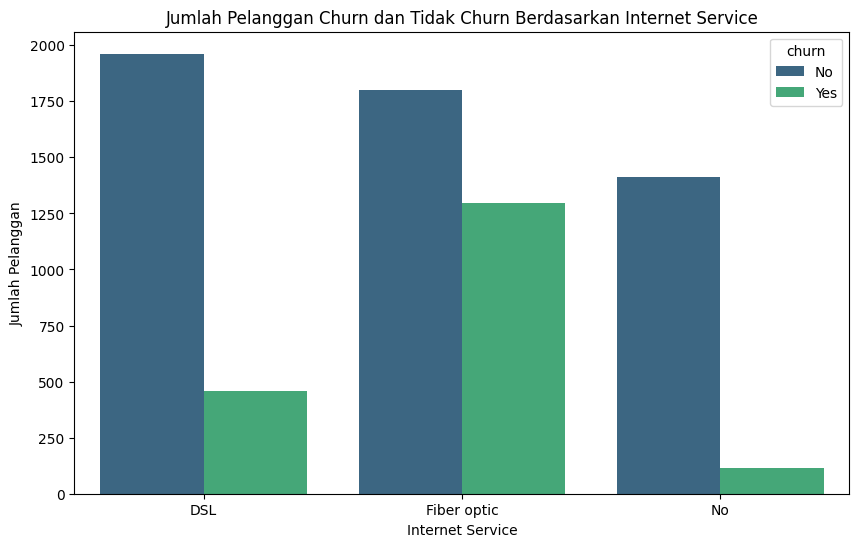

In [ ]:
# Menghitung jumlah pelanggan churn dan tidak churn berdasarkan InternetService
churn_counts = df.groupby(['internetservice', 'churn']).size().reset_index(name='Count')

# Visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='internetservice', y='Count', hue='churn', data=churn_counts, palette='viridis')

# Menambahkan judul dan label
plt.title('Jumlah Pelanggan Churn dan Tidak Churn Berdasarkan Internet Service', fontsize=12)
plt.xlabel('Internet Service', fontsize=10)
plt.ylabel('Jumlah Pelanggan', fontsize=10)

# Tampilkan plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

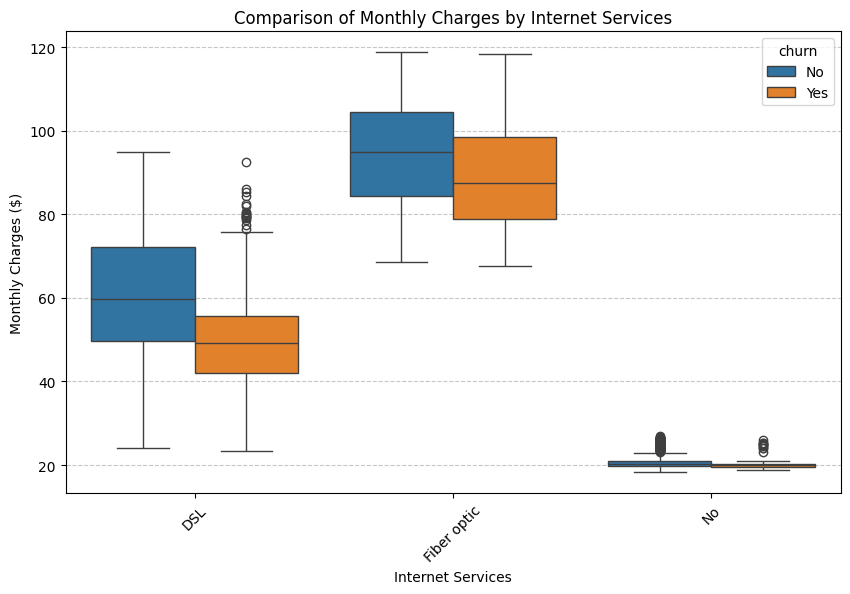

In [ ]:
data = df[['internetservice','monthlycharges','churn']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='internetservice', y='monthlycharges', hue='churn')
plt.title('Comparison of Monthly Charges by Internet Services')
plt.xlabel('Internet Services')
plt.ylabel('Monthly Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

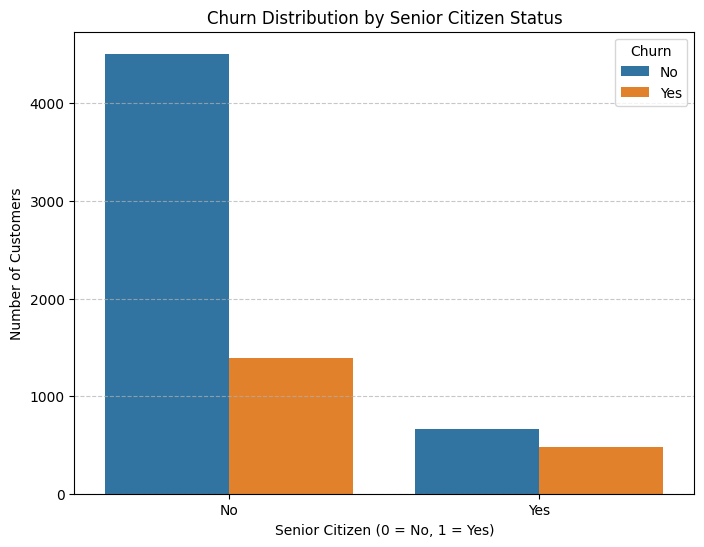

In [ ]:
# Menghitung jumlah kombinasi SeniorCitizen dan Churn
senior_churn_counts = df.groupby(['seniorcitizen', 'churn']).size().reset_index(name='Counts')

plt.figure(figsize=(8, 6))
sns.barplot(data=senior_churn_counts, x='seniorcitizen', y='Counts', hue='churn')
plt.title('Churn Distribution by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
services = ['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']

# Menghitung jumlah "Yes" untuk setiap layanan berdasarkan jenis InternetService
results = []

for service in services:
    counts = df[df[service] == 'Yes'].groupby('internetservice').size().to_dict()
    for internet_service, count in counts.items():
        results.append({'Service': service, 'InternetService': internet_service, 'Count': count})

# Buat DataFrame dari hasil perhitungan
ranked_df = pd.DataFrame(results)

In [ ]:
ranked_df

,Service,InternetService,Count
0,onlinesecurity,DSL,1180
1,onlinesecurity,Fiber optic,839
2,onlinebackup,DSL,1086
3,onlinebackup,Fiber optic,1343
4,deviceprotection,DSL,1065
5,deviceprotection,Fiber optic,1357
6,techsupport,DSL,1178
7,techsupport,Fiber optic,866
8,streamingtv,DSL,957
9,streamingtv,Fiber optic,1750


<ipython-input-20-2b04466f949e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Service', data=sorted_service_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

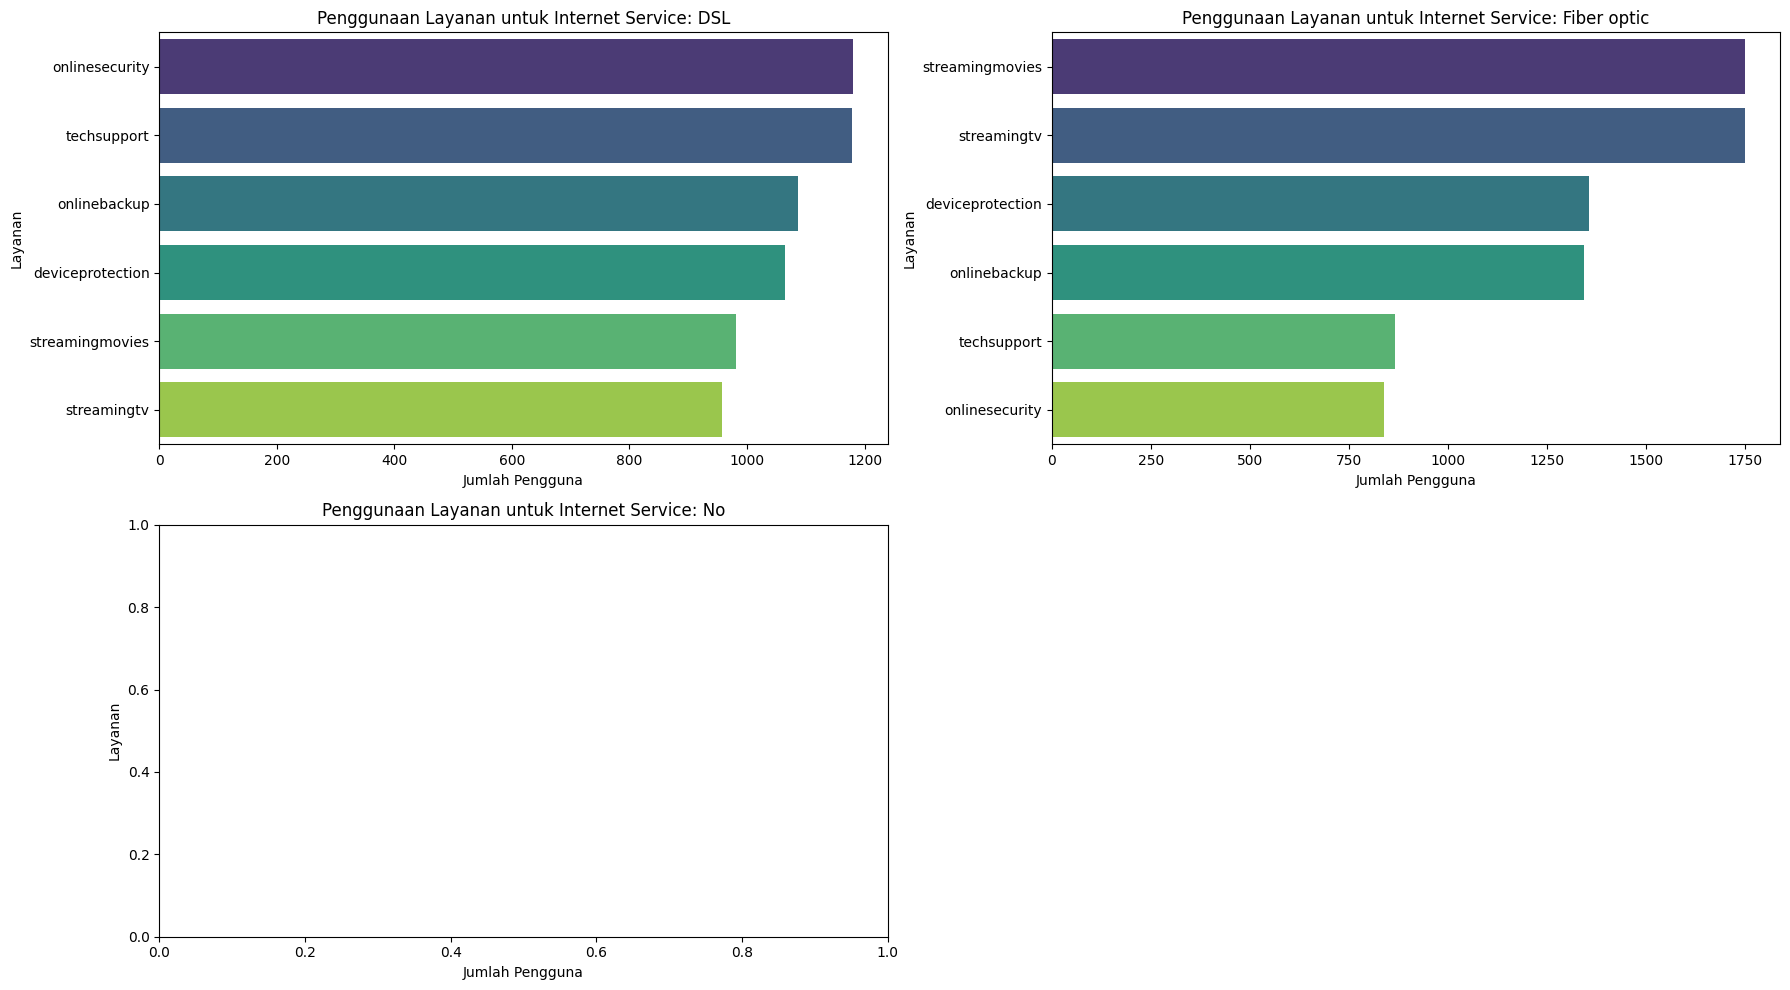

In [ ]:
# Buat bar plot untuk setiap jenis InternetService
plt.figure(figsize=(18, 10))

for idx, internet_service in enumerate(df['internetservice'].unique()):
    plt.subplot(2, 2, idx + 1)
    service_data = ranked_df[ranked_df['InternetService'] == internet_service]
    sorted_service_data = service_data.sort_values(by='Count', ascending=False)
    sns.barplot(x='Count', y='Service', data=sorted_service_data, palette='viridis')
    plt.title(f'Penggunaan Layanan untuk Internet Service: {internet_service}')
    plt.xlabel('Jumlah Pengguna')
    plt.ylabel('Layanan')

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

<ipython-input-23-f0be354089c8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Service', data=sorted_churn_service_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

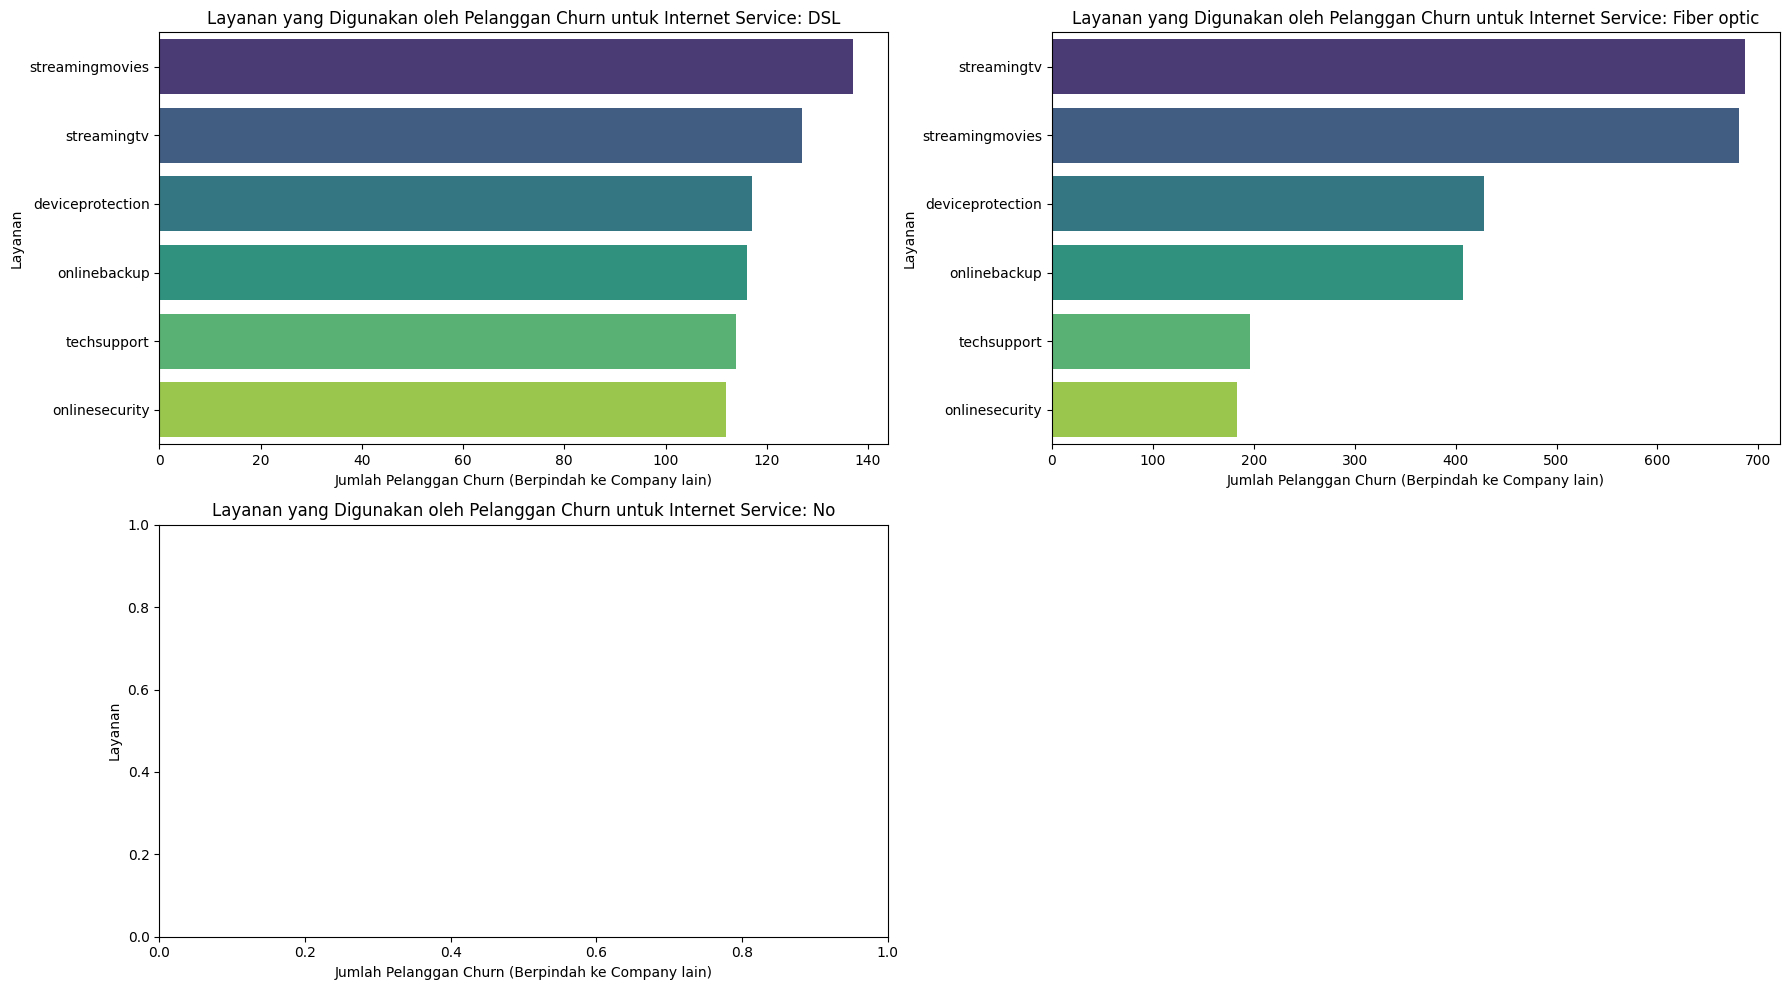

In [ ]:
# List layanan yang ingin dihitung
services = ['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']

# Filter data untuk Churn = Yes
churn_yes_df = df[df['churn'] == 'Yes']

# Menghitung jumlah "Yes" untuk setiap layanan berdasarkan jenis InternetService untuk pelanggan yang Churn
churn_results = []

for service in services:
    counts = churn_yes_df[churn_yes_df[service] == 'Yes'].groupby('internetservice').size().to_dict()
    for internet_service, count in counts.items():
        churn_results.append({'Service': service, 'InternetService': internet_service, 'Count': count})

# Buat DataFrame dari hasil perhitungan
churn_ranked_df = pd.DataFrame(churn_results)

# Buat bar plot untuk setiap jenis InternetService
plt.figure(figsize=(18, 10))

for idx, internet_service in enumerate(df['internetservice'].unique()):
    plt.subplot(2, 2, idx + 1)
    churn_service_data = churn_ranked_df[churn_ranked_df['InternetService'] == internet_service]
    sorted_churn_service_data = churn_service_data.sort_values(by='Count', ascending=False)
    sns.barplot(x='Count', y='Service', data=sorted_churn_service_data, palette='viridis')
    plt.title(f'Layanan yang Digunakan oleh Pelanggan Churn untuk Internet Service: {internet_service}')
    plt.xlabel('Jumlah Pelanggan Churn (Berpindah ke Company lain)')
    plt.ylabel('Layanan')

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

<ipython-input-40-7ac65fe45f8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='contract', y='monthlycharges', data=filtered_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple

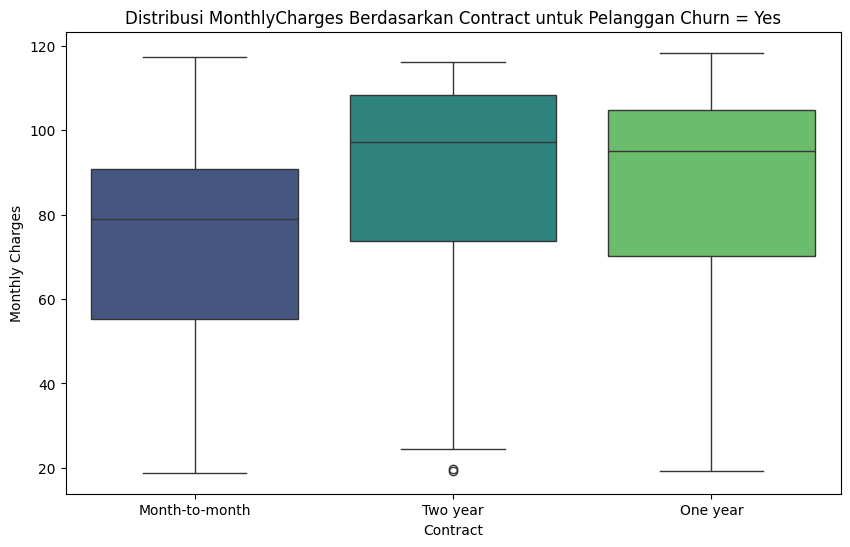

In [ ]:
# Filter data berdasarkan Churn = Yes
filtered_df = df[df['churn'] == 'Yes']

# Membuat box plot untuk melihat distribusi MonthlyCharges berdasarkan Contract
plt.figure(figsize=(10, 6))
sns.boxplot(x='contract', y='monthlycharges', data=filtered_df, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Distribusi MonthlyCharges Berdasarkan Contract untuk Pelanggan Churn = Yes')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')

# Menampilkan plot
plt.show()

# Modeling

## encoding

In [ ]:
df2 = df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = [
    'partner', 'dependents', 'phoneservice', 'paperlessbilling']

for column in categorical_columns:
    df2[column] = le.fit_transform(df2[column])

In [ ]:
df2

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,No
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,No
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,No
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,Yes


In [ ]:
df2.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [ ]:
col = ['multiplelines','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingmovies','streamingtv']


for i in range(len(col)):
  print(df[col[i]].unique())

['No phone service' 'No' 'Yes']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [ ]:
mapping = {
    'No' : 0,
    'DSL' : 1,
    'Fiber optic' : 2,
}

df2['internetservice'] = df2['internetservice'].map(mapping)

In [ ]:
multiple_lines_mapping = {
    'No' : 1,
    'Yes' : 2,
    'No phone service' : 0
}

df2['multiplelines'] = df2['multiplelines'].map(multiple_lines_mapping)

In [ ]:
online_security_mapping = {
    'No' : 1,
    'Yes' : 2,
    'No internet service' : 0
}

df2['onlinesecurity'] = df2['onlinesecurity'].map(online_security_mapping)

In [ ]:
online_backup_mapping = {
    'No' : 1,
    'Yes' : 2,
    'No internet service' : 0
}

df2['onlinebackup'] = df2['onlinebackup'].map(online_backup_mapping)

In [ ]:
device_protection_mapping = {
    'No' : 1,
    'Yes' : 2,
    'No internet service' : 0
}

df2['deviceprotection'] = df2['deviceprotection'].map(device_protection_mapping)

In [ ]:
tech_support_mapping = {
    'No' : 1,
    'Yes' : 2,
    'No internet service' : 0
}

df2['techsupport'] = df2['techsupport'].map(tech_support_mapping)

In [ ]:
streaming_tv_mapping = {
    'No' : 1,
    'Yes' : 2,
    'No internet service' : 0
}

df2['streamingtv'] = df2['streamingtv'].map(streaming_tv_mapping)

In [ ]:
streaming_movies_mapping = {
    'No' : 1,
    'Yes' : 2,
    'No internet service' : 0
}

df2['streamingmovies'] = df2['streamingmovies'].map(streaming_movies_mapping)

In [ ]:
contract_mapping = {
    'Month-to-month' : 0,
    'One year' : 1,
    'Two year' : 2
}

df2['contract'] = df2['contract'].map(contract_mapping)

In [ ]:
chrun_mapping = {
    'No' : 0,
    'Yes' : 1
}

df2['churn'] = df2['churn'].map(chrun_mapping)

In [ ]:
df2['monthlycharges'] = df2['monthlycharges'].astype(float)

In [ ]:
jumlah_spasi_kosong = (df2['totalcharges'].str.strip() == '').sum()
jumlah_spasi_kosong

0

In [ ]:
df2['totalcharges'] = pd.to_numeric(df2['totalcharges'])

In [ ]:
df2 = pd.get_dummies(df2, columns=['gender'])

In [ ]:
df2 = pd.get_dummies(df2, columns=['paymentmethod'])

In [ ]:
sex_mapping = {
    True : 1,
    False : 0
}

df2['gender_Male'] = df2['gender_Male'].map(sex_mapping)
df2['gender_Female'] = df2['gender_Female'].map(sex_mapping)
df2['paymentmethod_Bank transfer (automatic)'] = df2['paymentmethod_Bank transfer (automatic)'].map(sex_mapping)
df2['paymentmethod_Credit card (automatic)'] = df2['paymentmethod_Credit card (automatic)'].map(sex_mapping)
df2['paymentmethod_Electronic check'] = df2['paymentmethod_Electronic check'].map(sex_mapping)
df2['paymentmethod_Mailed check'] = df2['paymentmethod_Mailed check'].map(sex_mapping)

In [ ]:
df2.isna().sum()

,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0
deviceprotection,0


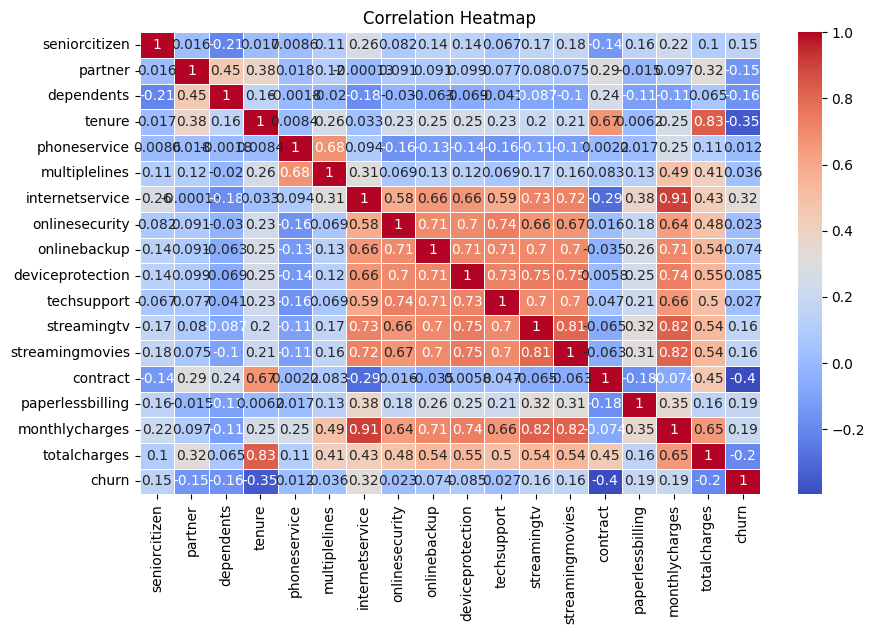

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
df2

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,...,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,gender_Male,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,1,0,0,1,1,2,1,...,1,29.85,29.85,0,1,0,0,0,1,0
1,0,0,0,34,1,1,1,2,1,2,...,0,56.95,1889.50,0,0,1,0,0,0,1
2,0,0,0,2,1,1,1,2,2,1,...,1,53.85,108.15,1,0,1,0,0,0,1
3,0,0,0,45,0,0,1,2,1,2,...,0,42.30,1840.75,0,0,1,1,0,0,0
4,0,0,0,2,1,1,2,1,1,1,...,1,70.70,151.65,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,1,2,1,2,...,1,84.80,1990.50,0,0,1,0,0,0,1
7039,0,1,1,72,1,2,2,1,2,2,...,1,103.20,7362.90,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,1,2,1,1,...,1,29.60,346.45,0,1,0,0,0,1,0
7041,1,1,0,4,1,2,2,1,1,1,...,1,74.40,306.60,1,0,1,0,0,0,1


In [ ]:
x = df2.drop(columns = ['churn'])
y = df2['churn']

In [ ]:
x.isna().sum()

,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0
deviceprotection,0


## No sampling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def accuracy(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai akurasi dari prediksi model ML '''
  # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung accuracy score
  accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)

  return accuracy

def precision(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai precision dari prediksi model ML '''
   # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung precision score
  precision = (true_positive)/(true_positive + false_positive)

  return precision

def recall(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai recall dari prediksi model ML '''

   # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung recall score
  recall = (true_positive)/(true_positive + false_negative)

  return recall

def f1(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai f1 dari prediksi model ML '''

  # Hitung recall score
  f1 = 2 * ((precision(conf_matrix)*recall(conf_matrix))/(precision(conf_matrix) + recall(conf_matrix)))

  return f1

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Panggil classifier
classifier = [svm.SVC(kernel = 'linear'), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors = 3)]

# Buat array yang akan diisi oleh skor masing-masing model classifier
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifier)):
  model = classifier[i]
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Tambahkan setiap skor ke array yang telah disediakan
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data_class = {'Model' : ['Support Vector Machine', 'Logistic Regression', 'Random Forest','KNN'], 'Training Accuracy' : training_accuracy,
              'Testing Accuracy' : testing_accuracy, 'Accuracy Score' : accuracy_score, 'Precision Score' : precision_score,
              'Recall Score' : recall_score, 'F1 Score' : f1_score}

df_result_model3 = pd.DataFrame(data_class)

In [ ]:
df_result_model3

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Support Vector Machine,0.797333,0.777541,0.777541,0.805085,0.919652,0.858563
1,Logistic Regression,0.804089,0.784648,0.784648,0.833638,0.882865,0.857546
2,Random Forest,0.997689,0.783937,0.783937,0.824000,0.897386,0.859129
3,KNN,0.859733,0.754087,0.754087,0.816007,0.858664,0.836792


## oversampling (SMOTE)

In [ ]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [ ]:
y.value_counts()

,count
churn,
0,5163
1,1869


In [ ]:
y_resampled.value_counts()

,count
churn,
0,5163
1,5163


In [ ]:
x_resampled

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,...,contract,paperlessbilling,monthlycharges,totalcharges,gender_Female,gender_Male,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,1,0,0,1,1,2,1,...,0,1,29.850000,29.850000,1,0,0,0,1,0
1,0,0,0,34,1,1,1,2,1,2,...,1,0,56.950000,1889.500000,0,1,0,0,0,1
2,0,0,0,2,1,1,1,2,2,1,...,0,1,53.850000,108.150000,0,1,0,0,0,1
3,0,0,0,45,0,0,1,2,1,2,...,1,0,42.300000,1840.750000,0,1,1,0,0,0
4,0,0,0,2,1,1,2,1,1,1,...,0,1,70.700000,151.650000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1,0,0,55,1,2,2,1,1,2,...,1,1,101.006833,5509.586153,1,0,0,0,0,0
10322,0,0,0,11,1,1,2,1,1,1,...,0,1,91.908973,1118.784208,1,0,0,0,1,0
10323,0,0,0,5,0,0,0,0,0,0,...,0,0,20.584202,126.728133,0,0,0,0,0,0
10324,0,0,0,2,1,1,2,1,1,1,...,0,1,78.950982,153.238826,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

### model

In [ ]:
def accuracy(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai akurasi dari prediksi model ML '''
  # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung accuracy score
  accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)

  return accuracy

def precision(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai precision dari prediksi model ML '''
   # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung precision score
  precision = (true_positive)/(true_positive + false_positive)

  return precision

def recall(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai recall dari prediksi model ML '''

   # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung recall score
  recall = (true_positive)/(true_positive + false_negative)

  return recall

def f1(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai f1 dari prediksi model ML '''

  # Hitung recall score
  f1 = 2 * ((precision(conf_matrix)*recall(conf_matrix))/(precision(conf_matrix) + recall(conf_matrix)))

  return f1

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Panggil classifier
classifier = [svm.SVC(kernel = 'linear'), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=3)]

# Buat array yang akan diisi oleh skor masing-masing model classifier
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifier)):
  model = classifier[i]
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Tambahkan setiap skor ke array yang telah disediakan
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data_class = {'Model' : ['Support Vector Machine', 'Logistic Regression', 'Random Forest','KNN'], 'Training Accuracy' : training_accuracy,
              'Testing Accuracy' : testing_accuracy, 'Accuracy Score' : accuracy_score, 'Precision Score' : precision_score,
              'Recall Score' : recall_score, 'F1 Score' : f1_score}

df_result_model = pd.DataFrame(data_class)

In [ ]:
df_result_model

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Support Vector Machine,0.837046,0.831075,0.831075,0.815018,0.858245,0.836073
1,Logistic Regression,0.819370,0.801065,0.801065,0.817444,0.777242,0.796836
2,Random Forest,0.999153,0.838335,0.838335,0.835721,0.843780,0.839731
3,KNN,0.882567,0.782188,0.782188,0.822173,0.722276,0.768994


In [ ]:
y_test.value_counts()

,count
churn,
0,1037
1,1029


## undersampling

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=3, n_neighbors_ver3=3)
x_resampled_under, y_resampled_under = nm.fit_resample(x, y)

In [ ]:
y.value_counts()

,count
churn,
0,5163
1,1869


In [ ]:
y_resampled_under.value_counts()

,count
churn,
0,1869
1,1869


In [ ]:
x_resampled_under

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,...,contract,paperlessbilling,monthlycharges,totalcharges,gender_Female,gender_Male,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,1,72,1,2,2,2,2,2,...,2,1,118.75,8672.45,1,0,1,0,0,0
1,0,1,1,72,1,2,2,2,2,2,...,2,0,117.50,8670.10,1,0,0,1,0,0
2,0,1,0,72,1,2,2,2,2,2,...,2,1,116.95,8594.40,0,1,0,1,0,0
3,0,1,0,72,1,2,2,1,2,2,...,2,1,110.60,7962.20,0,1,0,1,0,0
4,0,1,1,72,1,2,2,2,2,2,...,2,1,110.30,7966.90,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,0,0,0,12,1,1,1,1,1,1,...,1,1,59.80,727.80,0,1,0,0,1,0
3734,0,0,0,9,1,1,1,1,1,1,...,0,1,44.20,403.35,1,0,1,0,0,0
3735,1,0,0,1,1,2,2,1,1,1,...,0,1,75.75,75.75,0,1,0,0,1,0
3736,0,0,0,67,1,2,2,2,2,2,...,0,1,102.95,6886.25,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_resampled_under, y_resampled_under, test_size=0.2, random_state=42)

### model

In [ ]:
def accuracy(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai akurasi dari prediksi model ML '''
  # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung accuracy score
  accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)

  return accuracy

def precision(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai precision dari prediksi model ML '''
   # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung precision score
  precision = (true_positive)/(true_positive + false_positive)

  return precision

def recall(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai recall dari prediksi model ML '''

   # Definisikan variabel
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung recall score
  recall = (true_positive)/(true_positive + false_negative)

  return recall

def f1(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai f1 dari prediksi model ML '''

  # Hitung recall score
  f1 = 2 * ((precision(conf_matrix)*recall(conf_matrix))/(precision(conf_matrix) + recall(conf_matrix)))

  return f1

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Panggil classifier
classifier = [svm.SVC(kernel = 'linear'), LogisticRegression(max_iter = 250), RandomForestClassifier()]

# Buat array yang akan diisi oleh skor masing-masing model classifier
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifier)):
  model = classifier[i]
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Tambahkan setiap skor ke array yang telah disediakan
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data_class = {'Model' : ['Support Vector Machine', 'Logistic Regression', 'Random Forest'], 'Training Accuracy' : training_accuracy,
              'Testing Accuracy' : testing_accuracy, 'Accuracy Score' : accuracy_score, 'Precision Score' : precision_score,
              'Recall Score' : recall_score, 'F1 Score' : f1_score}

df_result_model2 = pd.DataFrame(data_class)

In [ ]:
df_result_model2

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Support Vector Machine,0.699331,0.729947,0.729947,0.705336,0.802111,0.750617
1,Logistic Regression,0.692308,0.721925,0.721925,0.740845,0.693931,0.716621
2,Random Forest,1.000000,0.704545,0.704545,0.683721,0.775726,0.726823


In [ ]:
y_test.value_counts()

,count
churn,
0,379
1,369


# meta data

In [ ]:
meta

,No,Column name,Description
0,1,customerID,NaN
1,2,gender,NaN
2,3,SeniorCitizen,Whether the customer is a senior citizen or no...
3,4,Partner,Whether the customer has a partner or not (Yes...
4,5,Dependents,Whether the customer has dependents or not (Ye...
5,6,tenure,Number of months the customer has stayed with ...
6,7,PhoneService,Whether the customer has a phone service or no...
7,8,MultipleLines,Whether the customer has multiple lines or not...
8,9,InternetService,"Customer’s internet service provider (DSL, Fib..."
9,10,OnlineSecurity,Whether the customer has online security or no...
